In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

from scipy.optimize import curve_fit

%matplotlib inline



mpl.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", { "xtick.major.size": 4, "ytick.major.size": 4, "font_color":'k', 'axes.edgecolor': 'k', 'xtick.color': 'k', 'ytick.color': 'k'})

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

In [2]:
plt.rcParams.update({'font.size': 18})

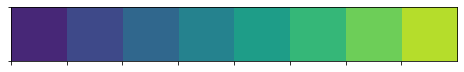

In [3]:
sns.palplot(sns.color_palette("viridis", 8))

In [4]:
full_df = pd.read_csv('./randomized_cr_df.csv')

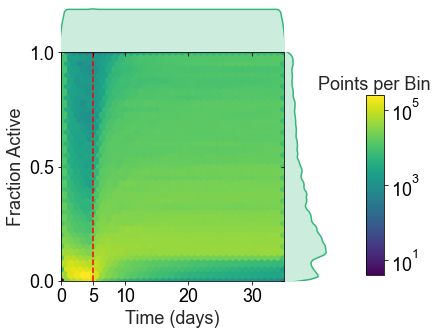

In [5]:
# plot active vs t
g = sns.JointGrid(x='t', y='a', data=full_df, space=0, xlim=(0, 35), ylim=(0, 1), height=5)
g = g.plot_joint(plt.hexbin, gridsize=35, bins='log', cmap='viridis', mincnt=1, extent=[0, 35, 0, 1])

g.ax_joint.set_yticks([0, 0.5, 1.0])
g.ax_joint.set_xticks([0, 5, 10, 20, 30])
g.ax_joint.axvline(5, 0, 1, color='r', linestyle='--')

cax = g.fig.add_axes([1.05, 0.2, .05, 0.5], facecolor='k')
cbar = plt.colorbar(cax=cax)
cbar.set_ticks([1, 10, 1000, 100000])
#cbar.set_ticklabels(["1", "10", "100", "1000", "10,000", "100,000"])
cax.set_title("Points per Bin", fontsize=18)

g.plot_marginals(sns.kdeplot, color=sns.color_palette("viridis", 8)[-3], shade=True)
g.set_axis_labels("Time (days)", "Fraction Active")
plt.savefig('../fig_s2a.pdf', bbox_inches='tight')